# I] Import and options


In [14]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [15]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [16]:
%%time
path = input_file_directory + "seahorse_data/ocr/experiment_8/non_normalized/exp8_ocr.csv"
ocr_exp2nonorm = pandas.read_csv(path, sep = ";")
ocr_exp2nonorm = ocr_exp2nonorm.rename(columns = {'Unnamed: 0':'Time'})
ocr_exp2nonorm = ocr_exp2nonorm.apply(lambda x: x.str.replace(',','.'))
ocr_exp2nonorm = ocr_exp2nonorm.astype(float)
print(ocr_exp2nonorm.shape)
ocr_exp2nonorm.head(2)

(15, 61)
Wall time: 33.9 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,131.14,128.04,145.92,148.60,137.18,144.41,122.02,126.29,151.55,...,75.52,69.52,91.51,57.47,40.14,45.94,40.51,38.76,18.34,32.54
1,7.76,122.84,111.35,134.10,141.08,129.37,136.57,114.81,121.53,144.70,...,74.65,70.90,87.18,52.05,39.26,45.13,40.94,39.13,16.70,33.84


In [17]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

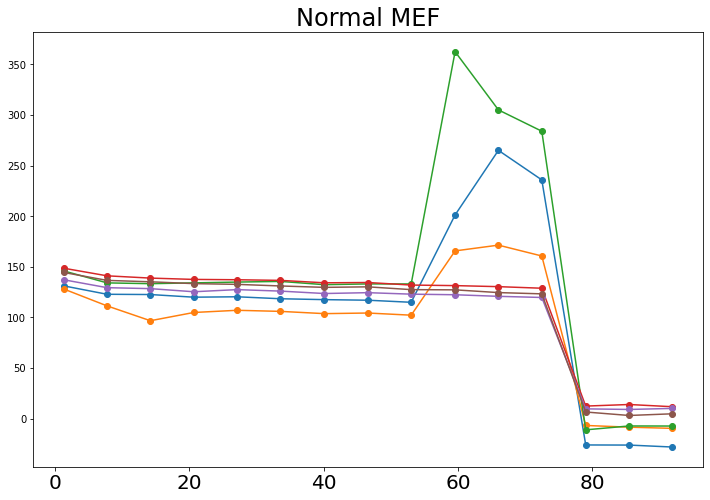

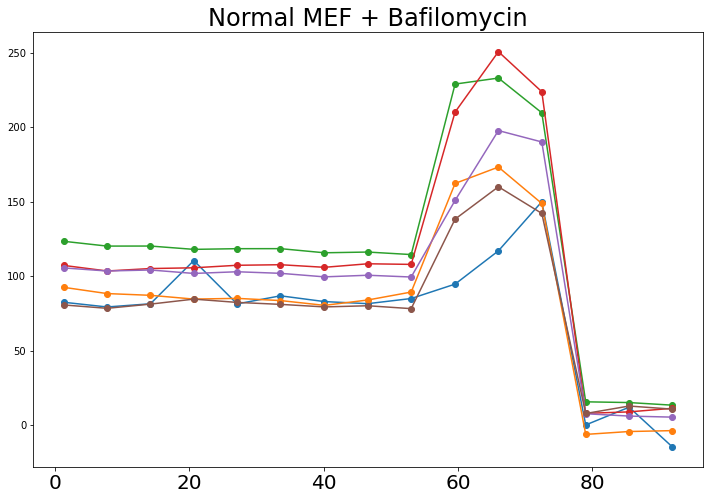

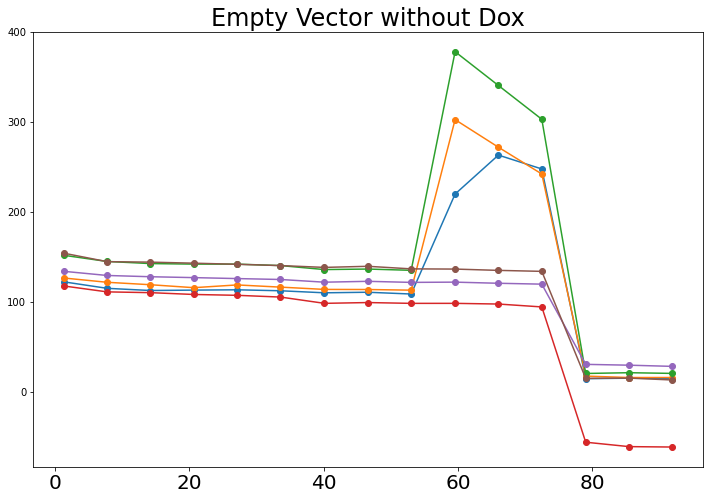

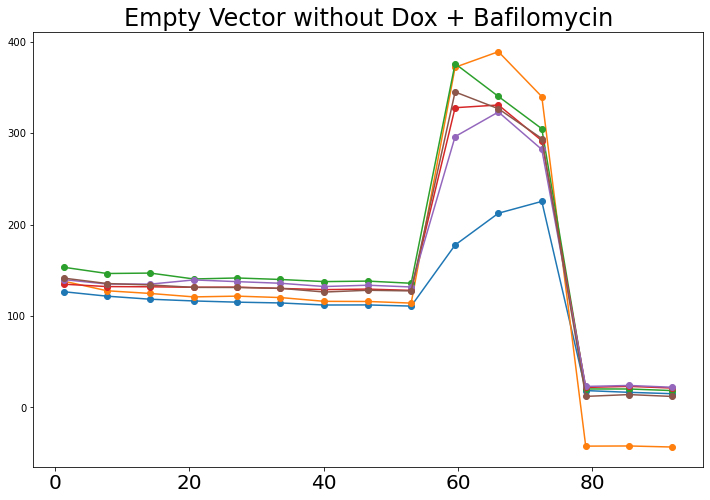

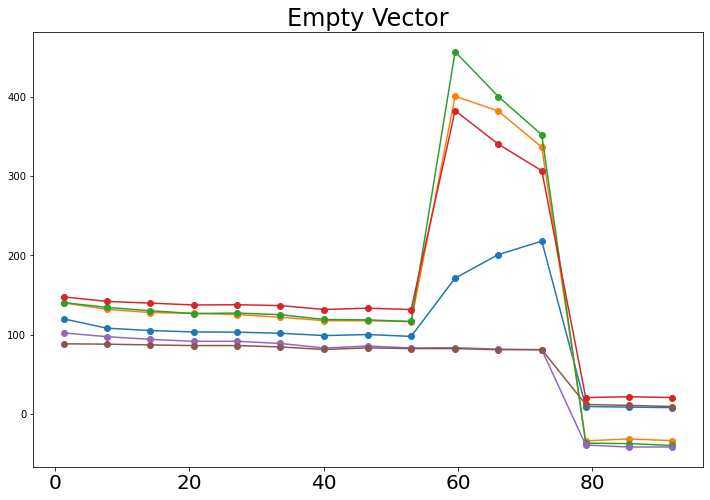

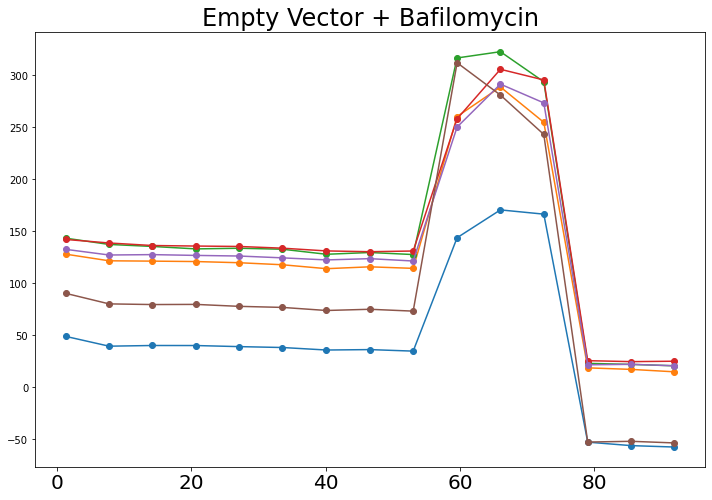

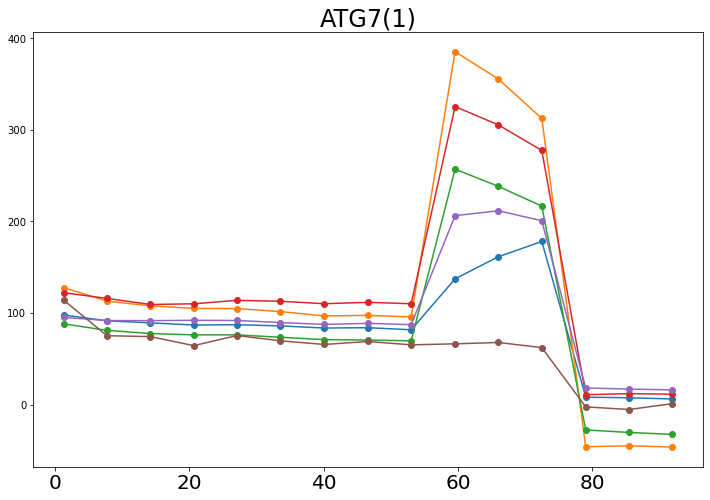

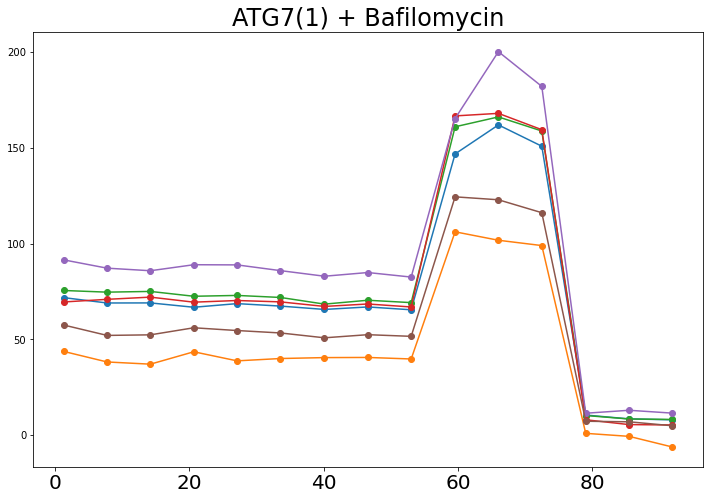

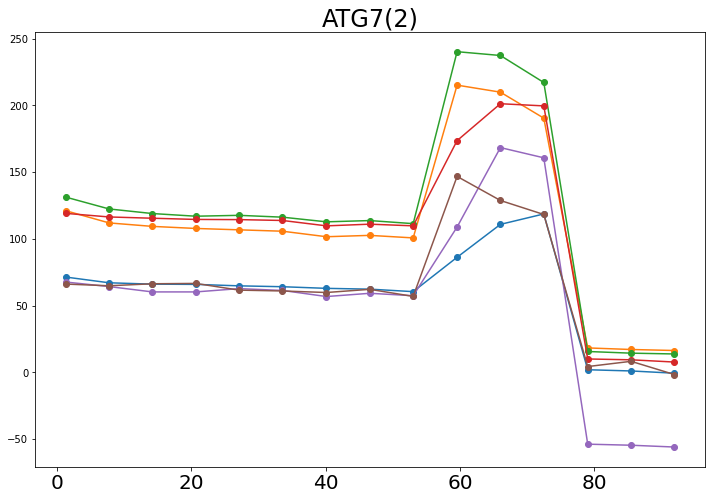

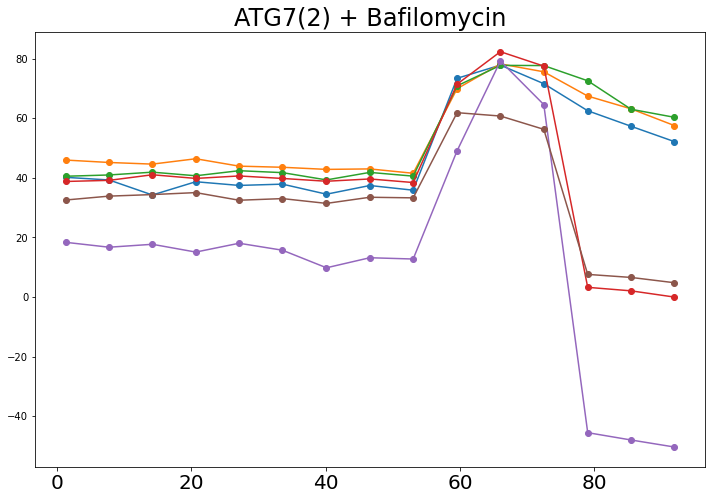

<Figure size 864x576 with 0 Axes>

In [18]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ocr_exp2nonorm['Time'], ocr_exp2nonorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [19]:
#define the wells for each condition
normal = ['B02','C02','D02']
ev_nodox = ['B03','C03','D03']
ev = ['C04','D04','E04']
wt1 = ['C05','D05','E05','F05']
wt2 = ['C06','D06','E06']

normal_baf = ['C07','D07','E07','F07','G07']
ev_nodox_baf = ['C08','D08','E08','F08','G08']
ev_baf = ['C09','D09','E09','F09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','G11']

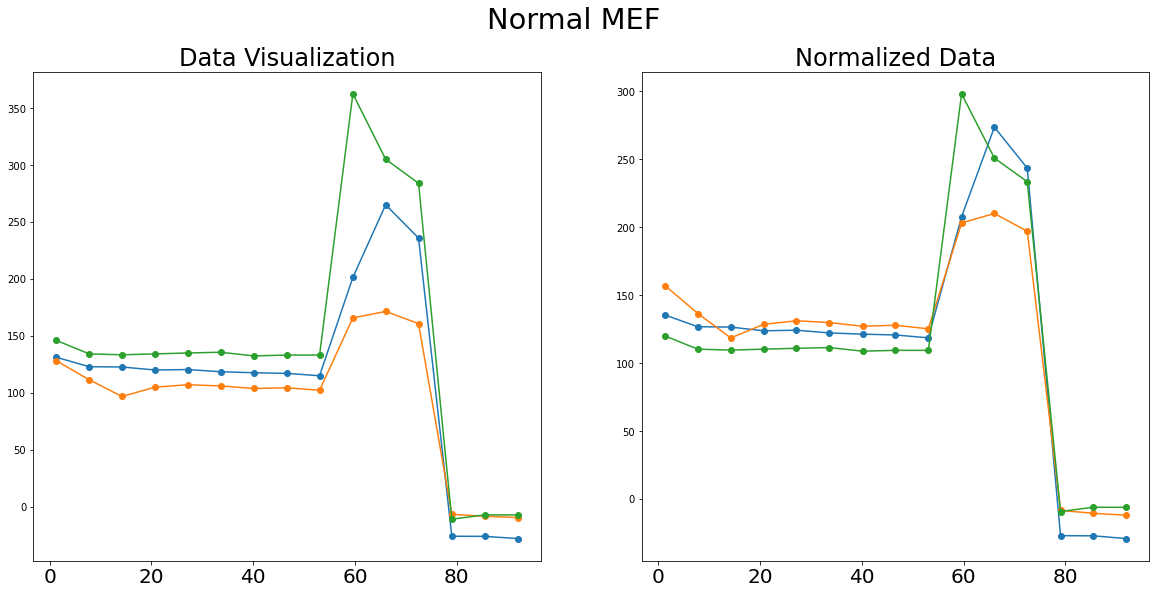

<Figure size 864x576 with 0 Axes>

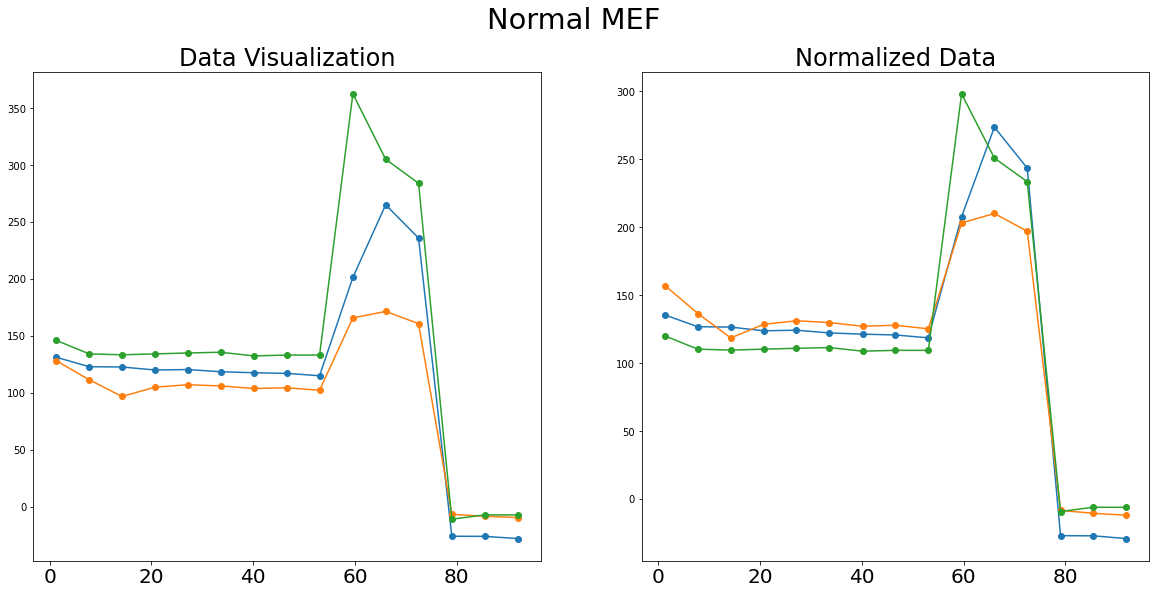

<Figure size 864x576 with 0 Axes>

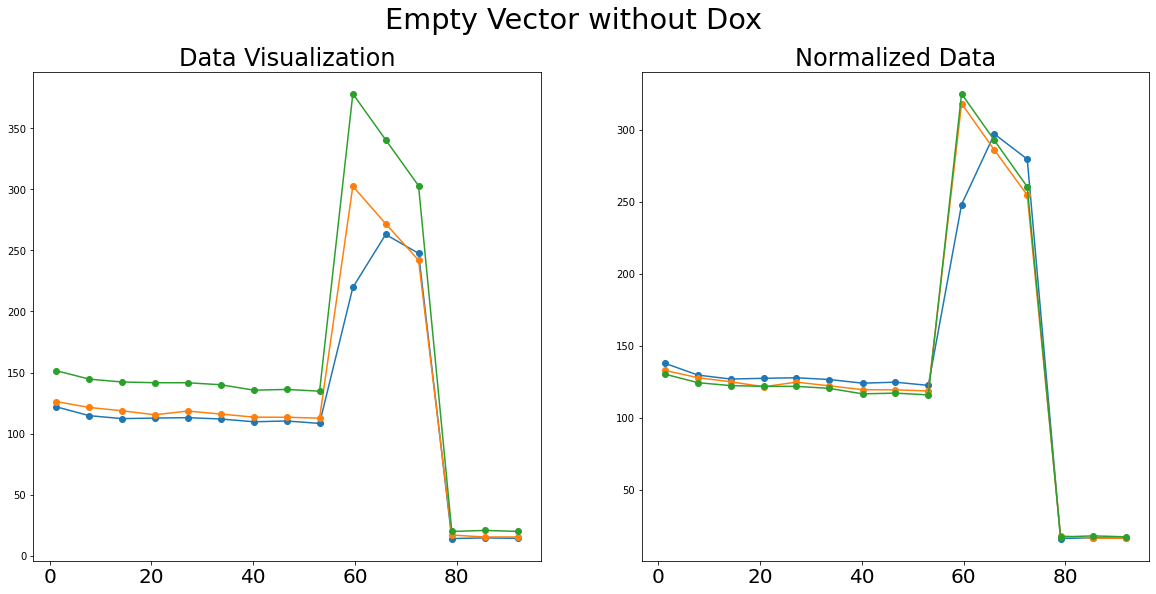

<Figure size 864x576 with 0 Axes>

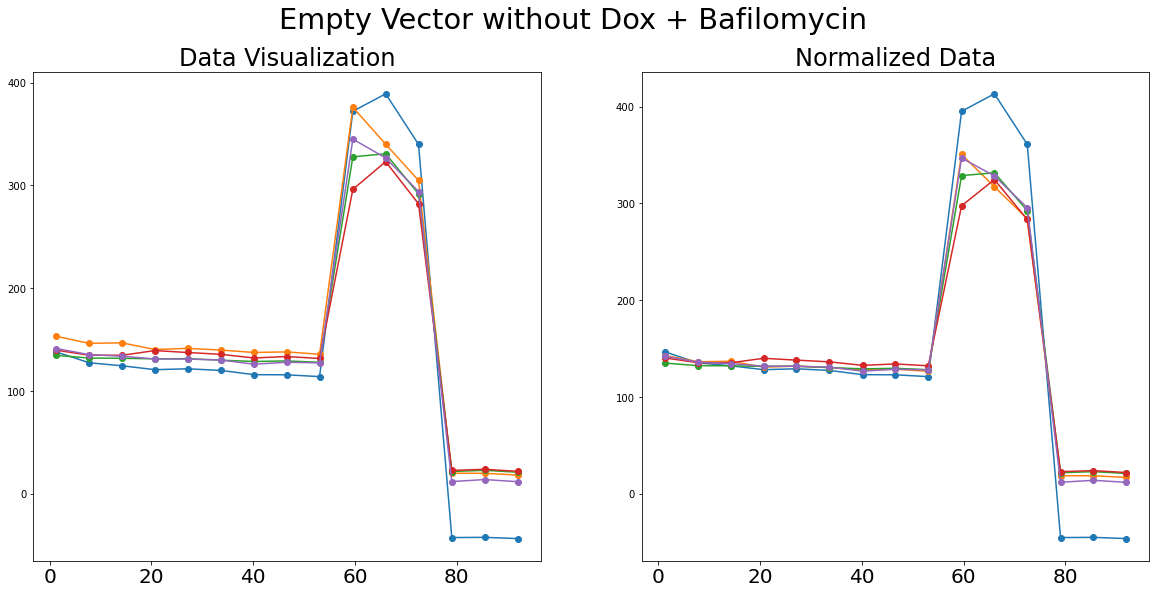

<Figure size 864x576 with 0 Axes>

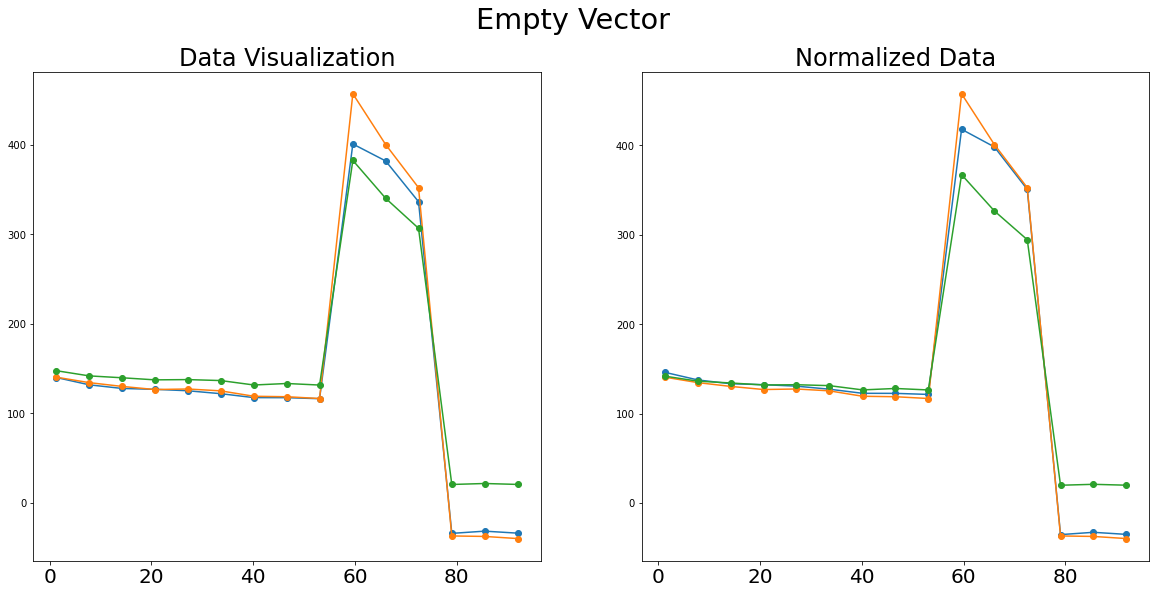

<Figure size 864x576 with 0 Axes>

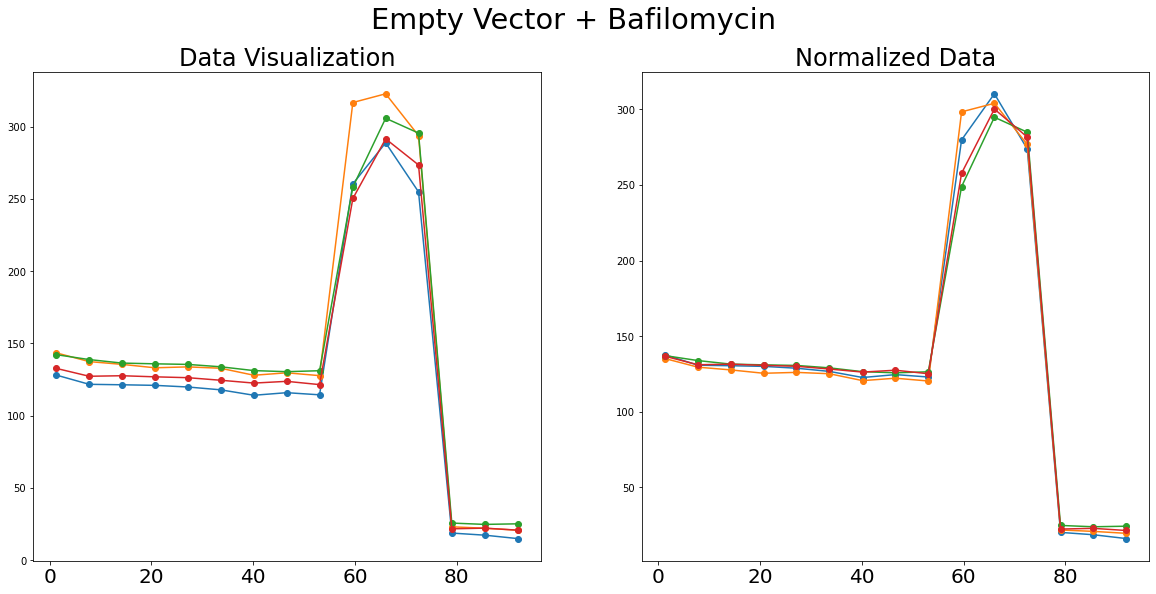

<Figure size 864x576 with 0 Axes>

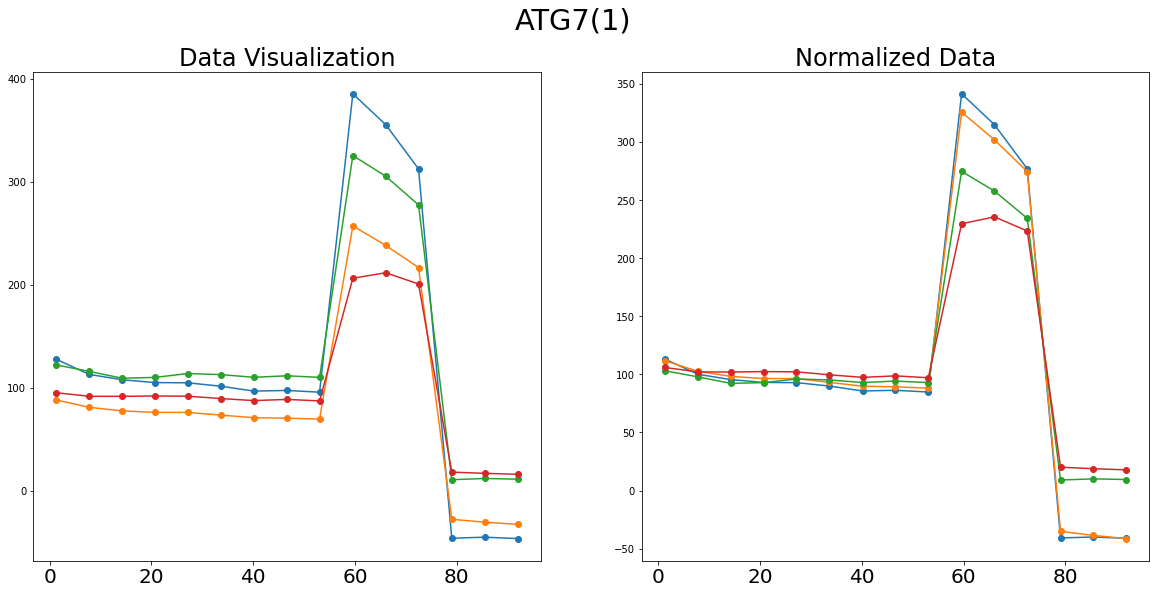

<Figure size 864x576 with 0 Axes>

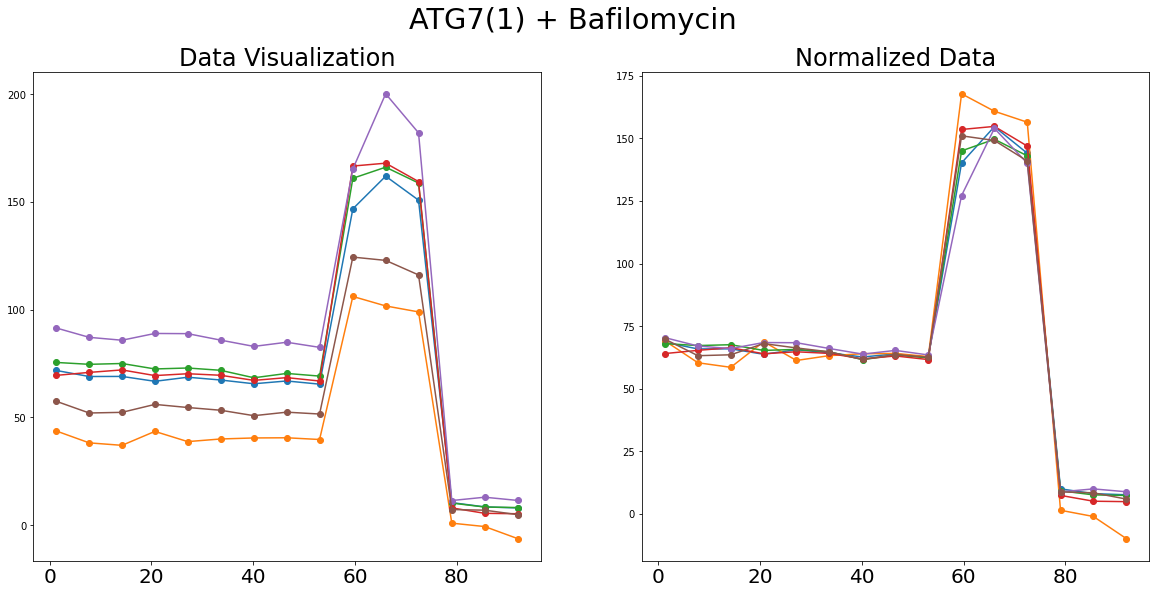

<Figure size 864x576 with 0 Axes>

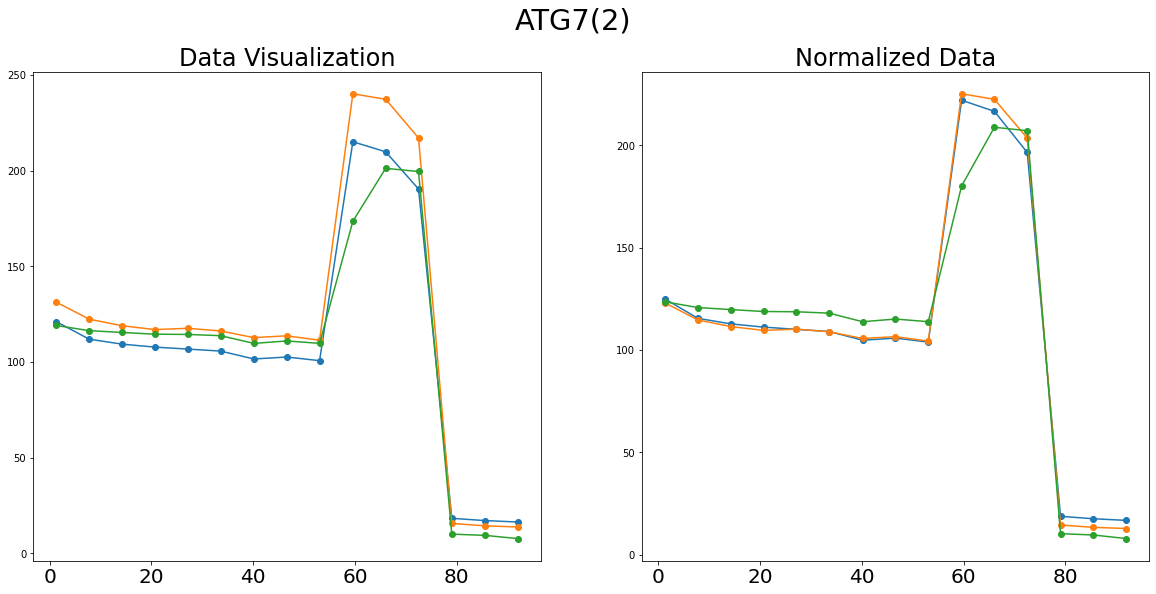

<Figure size 864x576 with 0 Axes>

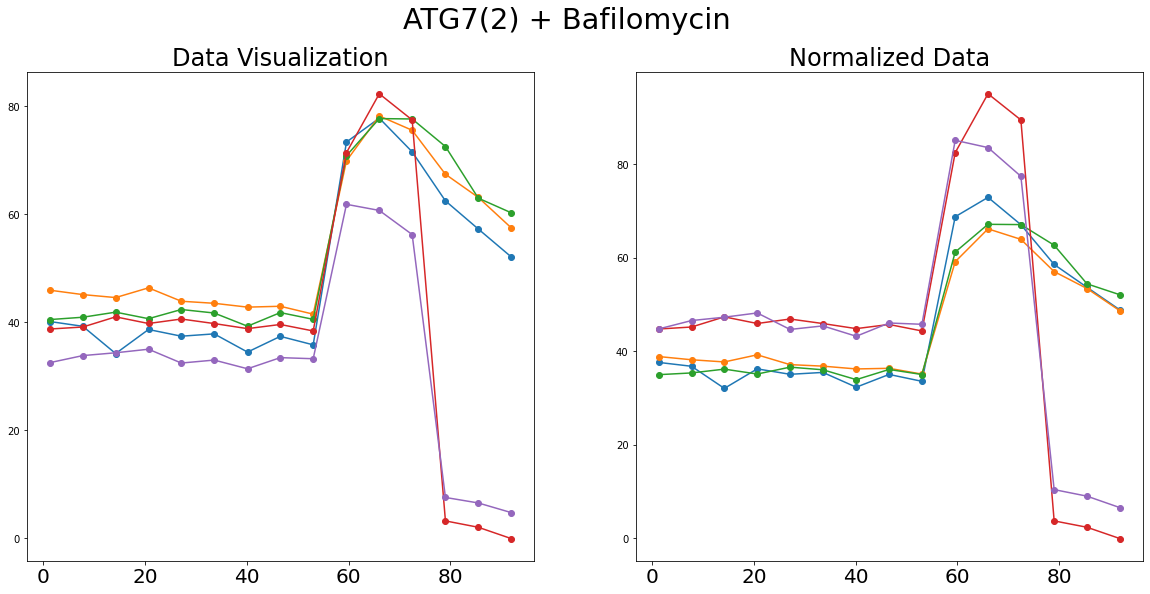

<Figure size 864x576 with 0 Axes>

In [20]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal MEF', "navy"],
            [normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_exp2nonorm['Time'], ocr_exp2nonorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_exp2nonorm[data[0]].mean()
    general_mean = ocr_exp2nonorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_exp2nonorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_exp2nonorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

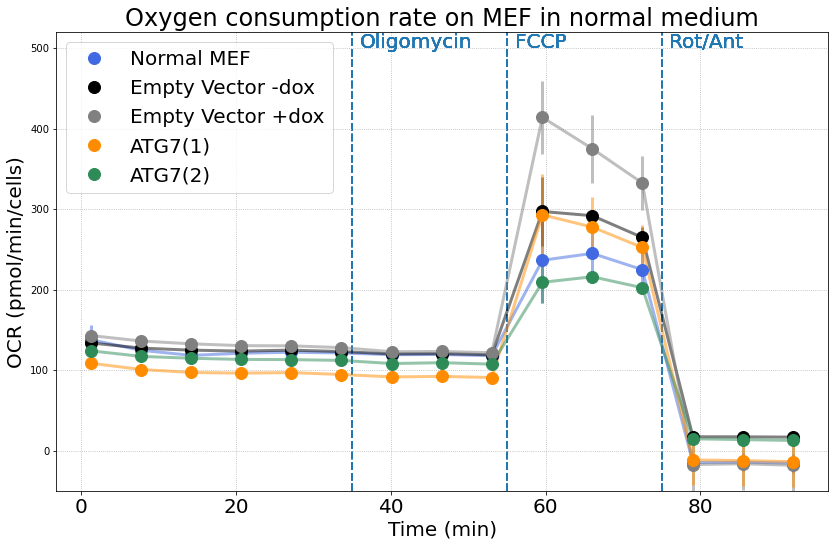

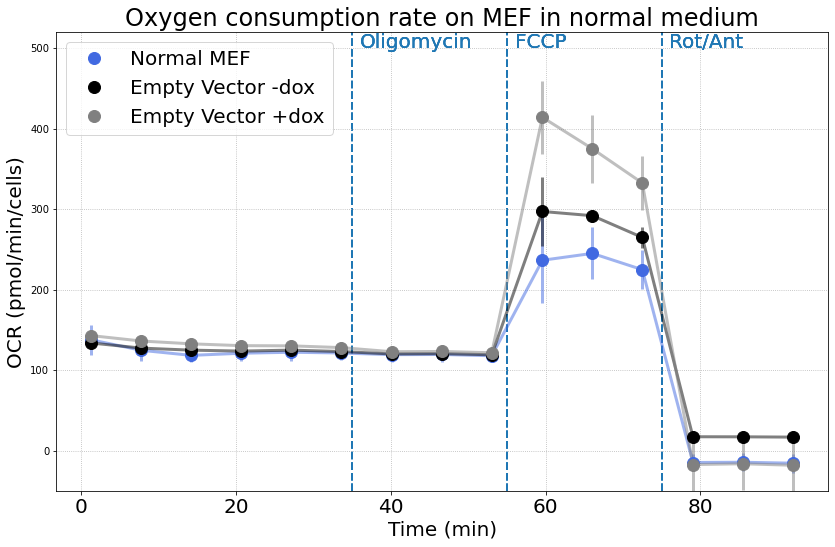

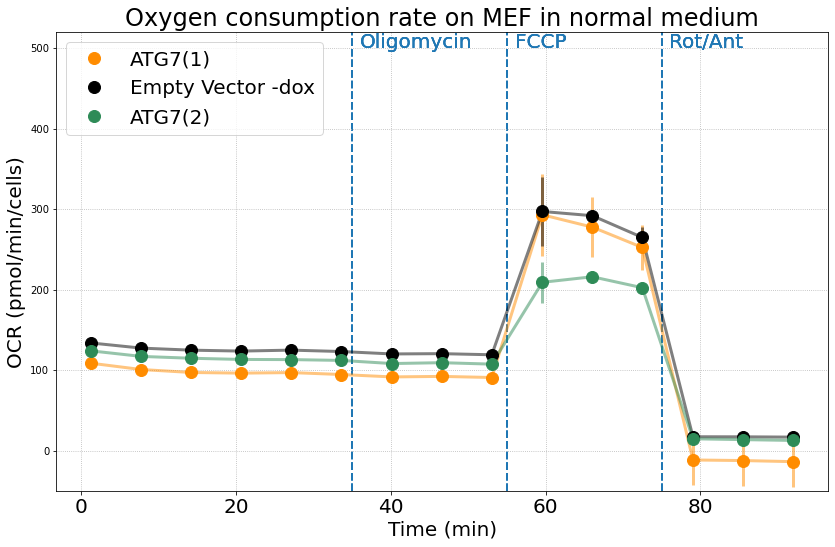

<Figure size 864x576 with 0 Axes>

In [21]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[wt1, 'ATG7(1)', 'darkorange'],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_exp2nonorm[data[0]].mean()
        general_mean = ocr_exp2nonorm[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_exp2nonorm[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_exp2nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_exp2nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 500, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 500, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 500, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF in normal medium')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([-50, 520])
        matplotlib.pyplot.tight_layout()

    plt.show()
    plt.clf()

In [22]:
#data preparation 
all_data = [[wt2, 'ATG7(2)', "seagreen"],
            [wt1, 'ATG7(1)', 'darkorange'],
            [ev, 'Empty Vector +dox', 'grey'],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [normal, 'Normal MEF', "royalblue"]]

stats_data = ocr_exp2nonorm.iloc[9:12, :]
stats_data.reset_index(inplace = True, drop= True)

for data in all_data:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]
        
        df = stats_data[sample_labels]
        df[name_val] = df.mean(axis= 1)
        col = df.pop(name_val)
        stats_data.insert(1, name_val, col)

stats_data = stats_data.iloc[:, :6]
stats_data

<ipython-input-22-5c4c965012f5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_val] = df.mean(axis= 1)


,Time,Normal MEF,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.58,243.210000,300.053333,413.276667,293.5050,209.616667
1,66.03,247.213333,291.730000,373.983333,277.6525,216.130000
2,72.49,226.880000,264.136667,331.636667,251.8225,202.356667


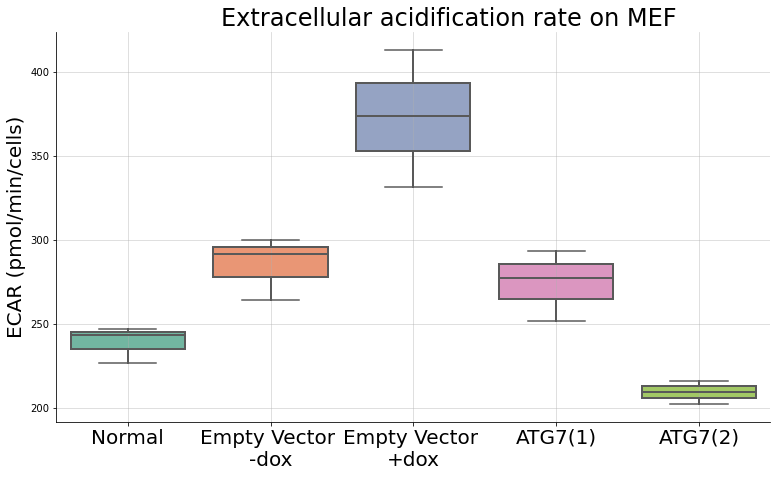

In [23]:
#Boxplot and Stats
Data = stats_data
shape = Data.shape
shape = shape[0]

#select the sample type column
Time = {'Time':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
Timedf = pandas.DataFrame(Time)
Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
Timedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(1,6)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'Normal'
data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

#graph
seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ECAR (pmol/min/cells)')
plt.xlabel('')
plt.title('Extracellular acidification rate on MEF', x=.55)
plt.grid(alpha = 0.5)

# save
path = 'ATG7/Seahorse_results/seahorse_OCR/'
plt.savefig(output_file_directory+path+'ocr_exp_8_noNorm_normal.svg')

# +BAF

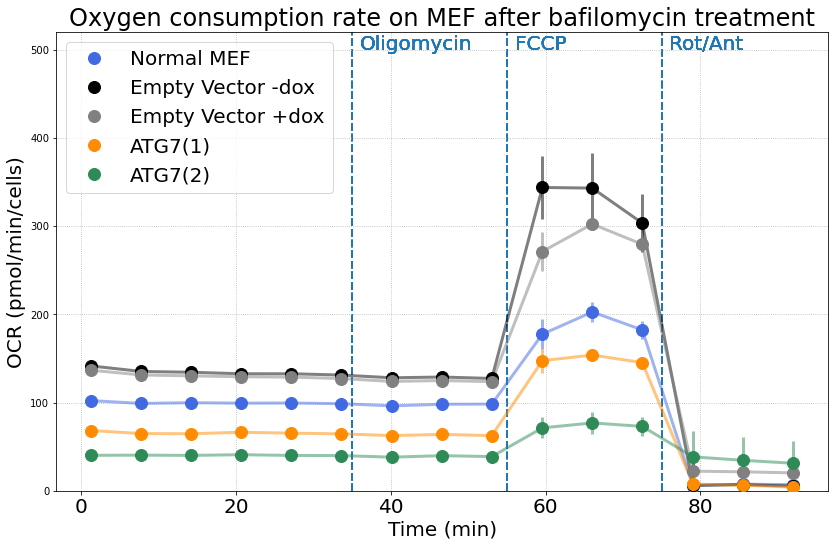

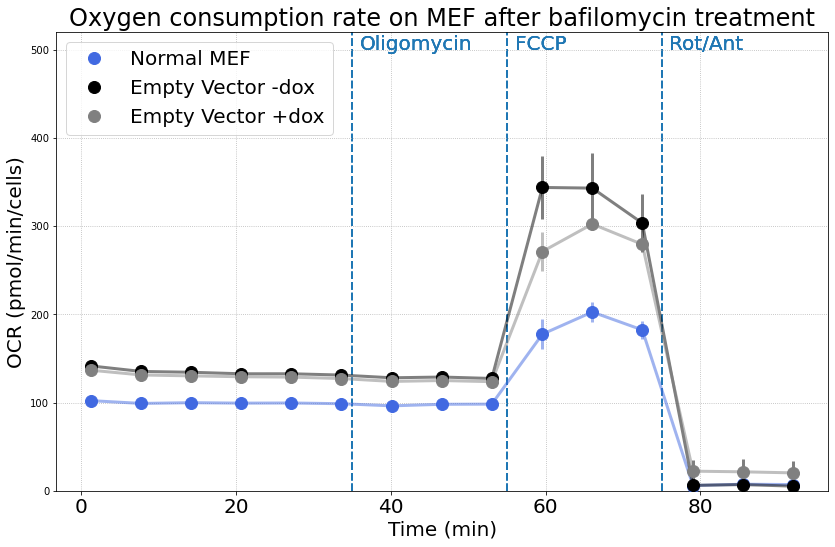

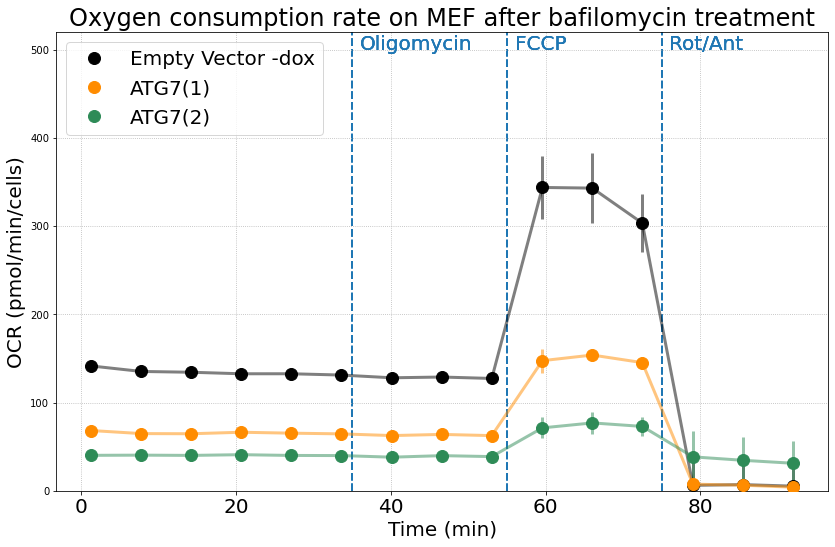

<Figure size 864x576 with 0 Axes>

In [24]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN
all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_nodox_baf, 'Empty Vector -dox', "black"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_exp2nonorm[data[0]].mean()
        general_mean = ocr_exp2nonorm[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_exp2nonorm[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_exp2nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_exp2nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 500, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 500, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 500, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF after bafilomycin treatment')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 520])
        matplotlib.pyplot.tight_layout()
        
    plt.show()
    plt.clf()

In [25]:
#data preparation 
all_data = [[wt2_baf, 'ATG7(2)', "seagreen"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [normal_baf, 'Normal MEF', "royalblue"]]

stats_data = ocr_exp2nonorm.iloc[9:12, :]
stats_data.reset_index(inplace = True, drop= True)

for data in all_data:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]
        
        df = stats_data[sample_labels]
        df[name_val] = df.mean(axis= 1)
        col = df.pop(name_val)
        stats_data.insert(1, name_val, col)

stats_data = stats_data.iloc[:, :6]
stats_data

<ipython-input-25-a133f39cff44>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_val] = df.mean(axis= 1)


,Time,Normal MEF,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.58,178.050,343.358,271.375,145.096667,69.470
1,66.03,202.866,341.908,302.190,153.531667,75.342
2,72.49,182.846,302.494,279.400,144.423333,71.692


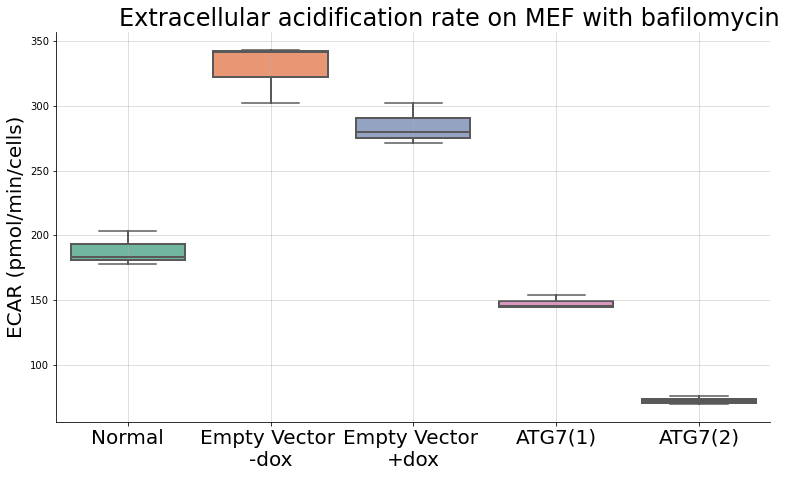

In [26]:
#Boxplot and Stats
Data = stats_data
shape = Data.shape
shape = shape[0]

#select the sample type column
Time = {'Time':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
Timedf = pandas.DataFrame(Time)
Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
Timedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(1,6)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'Normal'
data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

#graph
seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ECAR (pmol/min/cells)')
plt.xlabel('')
plt.title('Extracellular acidification rate on MEF with bafilomycin', x=.55)
plt.grid(alpha = 0.5)

# save
path = 'ATG7/Seahorse_results/seahorse_OCR/'
plt.savefig(output_file_directory+path+'ocr_exp_8_noNorm_bafilomycin.svg')